# Survey Data Analysis

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2 as pg2
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [2]:
xls = pd.ExcelFile('SurveyResults.xlsx')
df1 = pd.read_excel(xls, 'Survey Results')
df2 = pd.read_excel(xls, 'Basic Info')

In [3]:
df1.head(n=2)

,User ID,Question,Answer
0,24329031-FC5C-4D20-8560-5B53CA5BE38B,Is eating healthy and exercising important to ...,Extremely important
1,32CB510C-6C84-4A22-97B1-B15AB6C59D27,Is eating healthy and exercising important to ...,Extremely important


In [4]:
df2.head(n=2)

,User ID,Question,Answer
0,24329031-FC5C-4D20-8560-5B53CA5BE38B,Where do you live?,"Peterborough, Ontario"
1,24329031-FC5C-4D20-8560-5B53CA5BE38B,When is your birthday?,Date


In [5]:
# There are no null values
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 3 columns):
User ID     462 non-null object
Question    462 non-null object
Answer      462 non-null object
dtypes: object(3)
memory usage: 11.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1354 entries, 0 to 1353
Data columns (total 3 columns):
User ID     1354 non-null object
Question    1354 non-null object
Answer      1354 non-null object
dtypes: object(3)
memory usage: 31.9+ KB


In [6]:
df1.describe()

,User ID,Question,Answer
count,462,462,462
unique,43,9,33
top,46C4F0C3-404C-4322-B9DF-2C28156F3776,Select all the categories that you'd like to t...,"Beverages(Tea, Coffee, Juice)"
freq,13,134,31


In [7]:
# rename column
df1 = df1.rename(columns={'User ID': 'user_id'})
df2 = df2.rename(columns={'User ID': 'user_id'})
# Lower case column names
df1.columns = map(str.lower, df1.columns)
df2.columns = map(str.lower, df2.columns)

## Pre-Processing df1 (Survey Results) 

In [8]:
# put question with more than one answer to different dataframe
mc_df = df1[df1['question']=="Select all the categories that you'd like to try new products during the quarantine?"]
mc_df = mc_df.reset_index().drop('index',axis=1)

In [9]:
#delete this mc_df from df
df1 = df1[df1.question != "Select all the categories that you'd like to try new products during the quarantine?"]

In [10]:
df1.head(n=2)

,user_id,question,answer
0,24329031-FC5C-4D20-8560-5B53CA5BE38B,Is eating healthy and exercising important to ...,Extremely important
1,32CB510C-6C84-4A22-97B1-B15AB6C59D27,Is eating healthy and exercising important to ...,Extremely important


In [11]:
pivot_df1 = df1.pivot(index='user_id', columns='question', values='answer')

In [12]:
pivot_df1.head(n=2)

question,Are you buying new products since COVID-19?,Are you interested in trying new products that you have never tried before?,"Compared to before quarantine, which of these is a bigger driver in your purchase decision:",Did you ever buy a consumer product from an advertisement on Instagram or Facebook?,Is eating healthy and exercising important to you or anyone in your household?,What makes you decide to buy a product that you tried?,What makes you decide to buy new products?,"When it comes to consumer products, do you buy premium goods?"
user_id,,,,,,,,
0022601F-B1CB-4BC2-8F72-C20F231F5C2E,"Love to, but I am staying at home","Yes, but I need to try a sample first.",Accessibility (Delivery / Local stores),"Yes, sometimes",Extremely important,Product Quality,Friend’s Recommendation,"Fewer, these days"
067E2182-3CB6-4D74-ACF0-B334C733D6CC,Cannot find new product in stores,"Yes, but I need to try a sample first.",Accessibility (Delivery / Local stores),"Yes, but rarely",I exercise and eat healthy from time to time,Product Quality,Trying Products,"Fewer, these days"


In [13]:
pivot_df1.shape

(43, 8)

## Pre-Processing df2 (Basic Info)

In [14]:
df2.describe()

,user_id,question,answer
count,1354,1354,1354
unique,43,3,25
top,54A72E5E-4762-4D5B-ABC8-897BA28A7E54,Where do you live?,Date
freq,52,491,397


In [15]:
# We don't have specific value for users birthday so we remove this
(df2[df2['question']=='']['answer']).unique()

df2 = df2[df2.question != "When is your birthday?"]

df2 = df2.reset_index().drop('index',axis=1)

In [16]:
# As we can see there are duplicate information in the Basic Info dataset
df2.sort_values('user_id')[:3]

,user_id,question,answer
625,0022601F-B1CB-4BC2-8F72-C20F231F5C2E,Where do you live?,"Port Hope, Ontario"
819,0022601F-B1CB-4BC2-8F72-C20F231F5C2E,Where do you live?,"Port Hope, Ontario"
935,0022601F-B1CB-4BC2-8F72-C20F231F5C2E,Where do you live?,"Port Hope, Ontario"


In [17]:
#Drop duplicate info
df2.drop_duplicates(keep='first',inplace=True) 

In [18]:
pivot_df2 = df2.pivot(index='user_id', columns='question', values='answer')

In [19]:
pivot_df2.head(n=2)

question,What was your sex at birth?,Where do you live?
user_id,,
0022601F-B1CB-4BC2-8F72-C20F231F5C2E,Female,"Port Hope, Ontario"
067E2182-3CB6-4D74-ACF0-B334C733D6CC,Female,"Cambridge, Ontario"


In [20]:
pivot_df2.shape

(43, 2)

In [21]:
df = pd.merge(pivot_df1,pivot_df2,on='user_id')

## Pre Processing mc_df
### (Select all the categories that you'd like to try new products during the quarantine?)

In [22]:
mc_df.sort_values('user_id').head(n=10)

,user_id,question,answer
67,0022601F-B1CB-4BC2-8F72-C20F231F5C2E,Select all the categories that you'd like to t...,"Beverages(Tea, Coffee, Juice)"
97,0022601F-B1CB-4BC2-8F72-C20F231F5C2E,Select all the categories that you'd like to t...,Health & Personal Care
121,0022601F-B1CB-4BC2-8F72-C20F231F5C2E,Select all the categories that you'd like to t...,Beauty and Cosmetics
10,0022601F-B1CB-4BC2-8F72-C20F231F5C2E,Select all the categories that you'd like to t...,Healthy Snacks
15,067E2182-3CB6-4D74-ACF0-B334C733D6CC,Select all the categories that you'd like to t...,Healthy Snacks
44,067E2182-3CB6-4D74-ACF0-B334C733D6CC,Select all the categories that you'd like to t...,Food Supplements & Nourishments
125,067E2182-3CB6-4D74-ACF0-B334C733D6CC,Select all the categories that you'd like to t...,Beauty and Cosmetics
68,067E2182-3CB6-4D74-ACF0-B334C733D6CC,Select all the categories that you'd like to t...,"Beverages(Tea, Coffee, Juice)"
102,067E2182-3CB6-4D74-ACF0-B334C733D6CC,Select all the categories that you'd like to t...,Health & Personal Care
47,179131D8-9495-437D-9230-A55B672B880A,Select all the categories that you'd like to t...,Food Supplements & Nourishments


## Popular Categories during the Quarantine

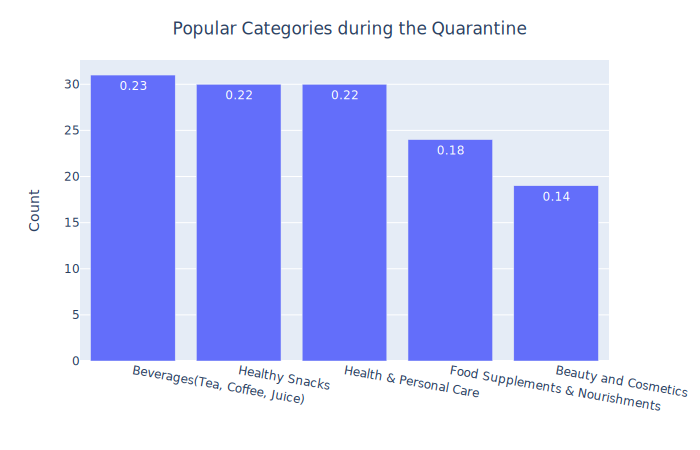

In [23]:
e = mc_df['answer'].value_counts()
fig = px.bar(e, x=e.index, y=e.values, height=400,text=np.round((e.values / sum(e.values)),2))
fig.update_layout( title={
        'text': "Popular Categories during the Quarantine",
        'y':0.95,'x':0.5,'xanchor': 'center','yanchor': 'top'},
    xaxis_title="",
    yaxis_title="Count")
fig.update_xaxes(tickangle=10)
fig.show(renderer='svg')

## Merge 2 dataframes

In [24]:
df.head(n=2)

question,Are you buying new products since COVID-19?,Are you interested in trying new products that you have never tried before?,"Compared to before quarantine, which of these is a bigger driver in your purchase decision:",Did you ever buy a consumer product from an advertisement on Instagram or Facebook?,Is eating healthy and exercising important to you or anyone in your household?,What makes you decide to buy a product that you tried?,What makes you decide to buy new products?,"When it comes to consumer products, do you buy premium goods?",What was your sex at birth?,Where do you live?
user_id,,,,,,,,,,
0022601F-B1CB-4BC2-8F72-C20F231F5C2E,"Love to, but I am staying at home","Yes, but I need to try a sample first.",Accessibility (Delivery / Local stores),"Yes, sometimes",Extremely important,Product Quality,Friend’s Recommendation,"Fewer, these days",Female,"Port Hope, Ontario"
067E2182-3CB6-4D74-ACF0-B334C733D6CC,Cannot find new product in stores,"Yes, but I need to try a sample first.",Accessibility (Delivery / Local stores),"Yes, but rarely",I exercise and eat healthy from time to time,Product Quality,Trying Products,"Fewer, these days",Female,"Cambridge, Ontario"


In [25]:
#Define an information dectionary for features
info_dic = {'buy_since_covid':'Are you buying new products since COVID-19?',
'try_new':'Are you interested in trying new products that you have never tried before?',
'purchasing_driver':'Compared to before quarantine, which of these is a bigger driver in your purchase decision:',
'social_media_ad':'Did you ever buy a consumer product from an advertisement on Instagram or Facebook? ',
'health':'Is eating healthy and exercising important to you or anyone in your household?',
'try_again':'What makes you decide to buy a product that you tried? ',
'decide_on_product':'What makes you decide to buy new products?',
'premium_goods':'When it comes to consumer products, do you buy premium goods?',
'gender':'What was your sex at birth?',
'location':'Where do you live?'}

In [26]:
# Rename some columns

df = df.rename(columns={info_dic['gender']: 'gender'})
df = df.rename(columns={info_dic['location']: 'location'})
df = df.rename(columns={info_dic['buy_since_covid']: 'buy_since_covid'})
df = df.rename(columns={info_dic['try_new']:'try_new'})
df = df.rename(columns={info_dic['purchasing_driver']:'purchasing_driver'})
df = df.rename(columns={info_dic['social_media_ad']: 'social_media_ad'})
df = df.rename(columns={info_dic['health']: 'health'})
df = df.rename(columns={info_dic['try_again']: 'try_again'})
df = df.rename(columns={info_dic['decide_on_product']: 'decide_on_product'})
df = df.rename(columns={info_dic['premium_goods']: 'premium_goods'})

In [27]:
df.head(n=2)

question,buy_since_covid,try_new,purchasing_driver,social_media_ad,health,try_again,decide_on_product,premium_goods,gender,location
user_id,,,,,,,,,,
0022601F-B1CB-4BC2-8F72-C20F231F5C2E,"Love to, but I am staying at home","Yes, but I need to try a sample first.",Accessibility (Delivery / Local stores),"Yes, sometimes",Extremely important,Product Quality,Friend’s Recommendation,"Fewer, these days",Female,"Port Hope, Ontario"
067E2182-3CB6-4D74-ACF0-B334C733D6CC,Cannot find new product in stores,"Yes, but I need to try a sample first.",Accessibility (Delivery / Local stores),"Yes, but rarely",I exercise and eat healthy from time to time,Product Quality,Trying Products,"Fewer, these days",Female,"Cambridge, Ontario"


In [28]:
#Drop null values
df=df.dropna()

In [29]:
df['user_id'] = df.index

In [30]:
df= df.reset_index(drop=True)

In [31]:
df.head(n=2)

question,buy_since_covid,try_new,purchasing_driver,social_media_ad,health,try_again,decide_on_product,premium_goods,gender,location,user_id
0,"Love to, but I am staying at home","Yes, but I need to try a sample first.",Accessibility (Delivery / Local stores),"Yes, sometimes",Extremely important,Product Quality,Friend’s Recommendation,"Fewer, these days",Female,"Port Hope, Ontario",0022601F-B1CB-4BC2-8F72-C20F231F5C2E
1,Cannot find new product in stores,"Yes, but I need to try a sample first.",Accessibility (Delivery / Local stores),"Yes, but rarely",I exercise and eat healthy from time to time,Product Quality,Trying Products,"Fewer, these days",Female,"Cambridge, Ontario",067E2182-3CB6-4D74-ACF0-B334C733D6CC


## Feature Engineering and Analysis

In [32]:
df['try_new'].unique()
info_dic['try_new']

'Are you interested in trying new products that you have never tried before?'

In [33]:
df.columns

Index(['buy_since_covid', 'try_new', 'purchasing_driver', 'social_media_ad',
       'health', 'try_again', 'decide_on_product', 'premium_goods', 'gender',
       'location', 'user_id'],
      dtype='object', name='question')

## Extract city and province from location

In [34]:
#Replace location with 2 columns, city and province
df['city'] = df['location'].apply(lambda x: x.replace(" ", "").split(',')[0])
df['province'] = df['location'].apply(lambda x: x.replace(" ", "").split(',')[1])

In [35]:
df=df.drop('location',axis=1)

In [36]:
df.head(n=2)

question,buy_since_covid,try_new,purchasing_driver,social_media_ad,health,try_again,decide_on_product,premium_goods,gender,user_id,city,province
0,"Love to, but I am staying at home","Yes, but I need to try a sample first.",Accessibility (Delivery / Local stores),"Yes, sometimes",Extremely important,Product Quality,Friend’s Recommendation,"Fewer, these days",Female,0022601F-B1CB-4BC2-8F72-C20F231F5C2E,PortHope,Ontario
1,Cannot find new product in stores,"Yes, but I need to try a sample first.",Accessibility (Delivery / Local stores),"Yes, but rarely",I exercise and eat healthy from time to time,Product Quality,Trying Products,"Fewer, these days",Female,067E2182-3CB6-4D74-ACF0-B334C733D6CC,Cambridge,Ontario


## Exploratory Data Analysis (EDA)

## Gender

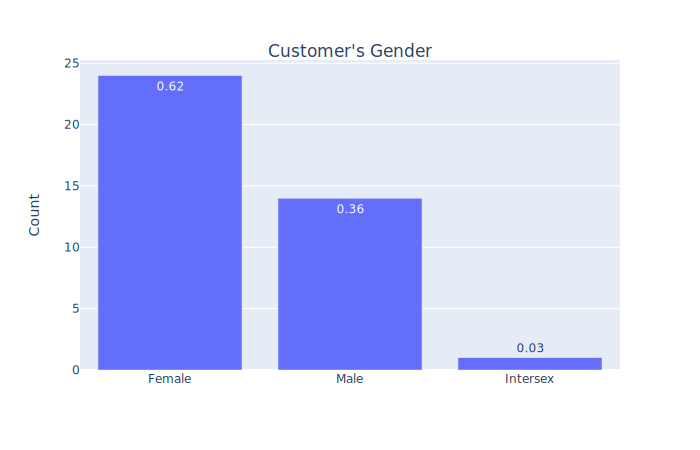

In [37]:
fig = px.bar(df['gender'].value_counts(), x=df['gender'].value_counts().index,
             y=df['gender'].value_counts().values, height=400,
             text=np.round((df['gender'].value_counts().values / sum(df['gender'].value_counts().values)),2))
fig.update_layout( title={
        'text': "Customer's Gender",
        'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
    xaxis_title="",
    yaxis_title="Count")
fig.show(renderer='svg')

The following bar chart illustrates the Customer's Gender percentage. 62 percent of customers are female and 36 percent are male. Also, 3% identified themselves as intersex at birth.

## Location

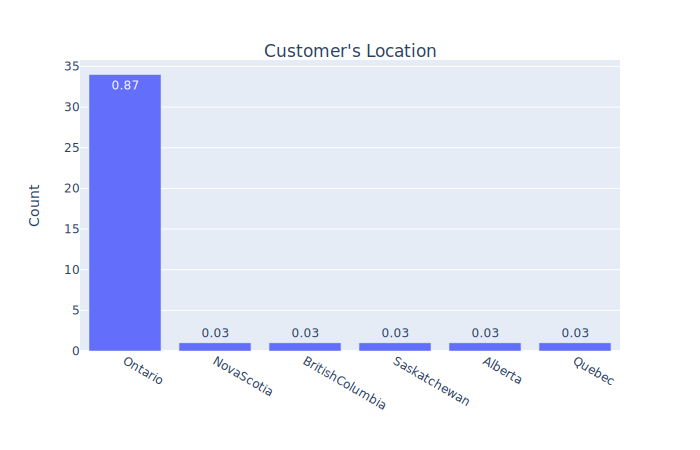

In [38]:
fig = px.bar(df['province'].value_counts(), x=df['province'].value_counts().index,
             y=df['province'].value_counts().values, height=400,
             text=np.round((df['province'].value_counts().values / sum(df['province'].value_counts().values)),2))
fig.update_layout( title={
        'text': "Customer's Location",
        'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
    xaxis_title="",
    yaxis_title="Count")
fig.show(renderer='svg')

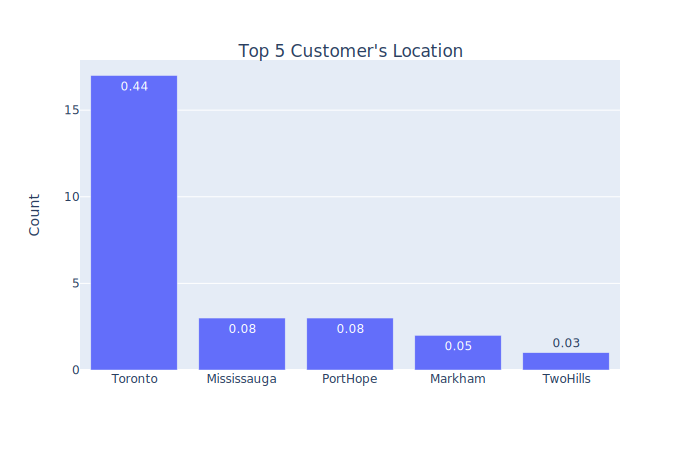

In [39]:
fig = px.bar(df['city'].value_counts().head(5), x=df['city'].value_counts().head(5).index,
             y=df['city'].value_counts().head(5).values, height=400,
             text=np.round((df['city'].value_counts().head(5).values / sum(df['city'].value_counts().values)),2))
fig.update_layout( title={
        'text': "Top 5 Customer's Location",
        'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
    xaxis_title="",
    yaxis_title="Count")
fig.show(renderer='svg')

The two above bar charts indicate that 87% of customers are located in Ontario and overall 44% of them live in Toronto. 
The other cities which have the most number of customers are PortHope, Mississauga, and Markham respectively.

## Are you buying new products since COVID-19?

In [40]:
df = df.replace('Love to, but I am staying at home ', 'No but love to')
df = df.replace('Cannot find new product in stores', 'No Cannot find new product')
df = df.replace('I actively buy new products', 'Yes actively')
df = df.replace('No, I’m a creature of habit', 'No')

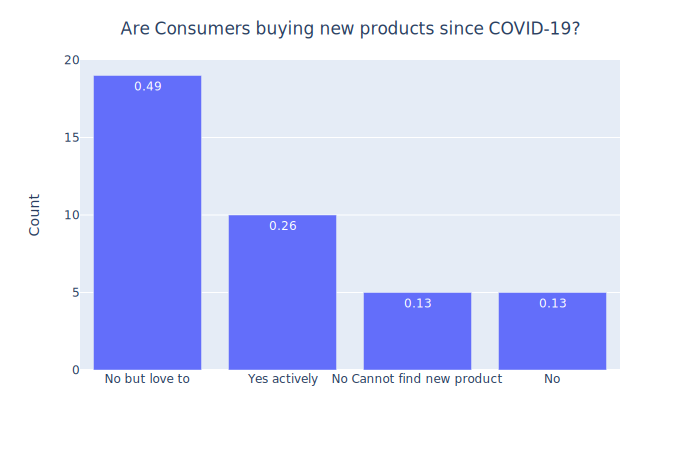

In [41]:
a = df['buy_since_covid'].value_counts()
fig = px.bar(a, x=a.index, y=a.values, height=400,text=np.round((a.values / sum(a.values)),2))
fig.update_layout( title={
        'text': 'Are Consumers buying new products since COVID-19?',
        'y':0.95,'x':0.5,'xanchor': 'center','yanchor': 'top'},
    xaxis_title="",
    yaxis_title="Count")
fig.update_xaxes(tickangle=0)
fig.show(renderer='svg')

According to the above bar chart, we can observe that near half of the customers who participated in the survey haven't bought new products since COVID-19 but they are interested to do so. On the other hand, 26% of the customers are actively buying new products. 
However, the pie chart shows that because of the impact of Covid-19, 74.4% of customers are not buying new products because of various reasons.

In [42]:
a = df['buy_since_covid']

#Turn every row with "No" to No
new_a=[]
for i in a.values:
    if 'No' in i:
        i=i.replace(i, "No")
        new_a.append(i)
    else:
        i=i.replace(i, "Yes")
        new_a.append(i)
a_df = pd.DataFrame({'col':new_a})

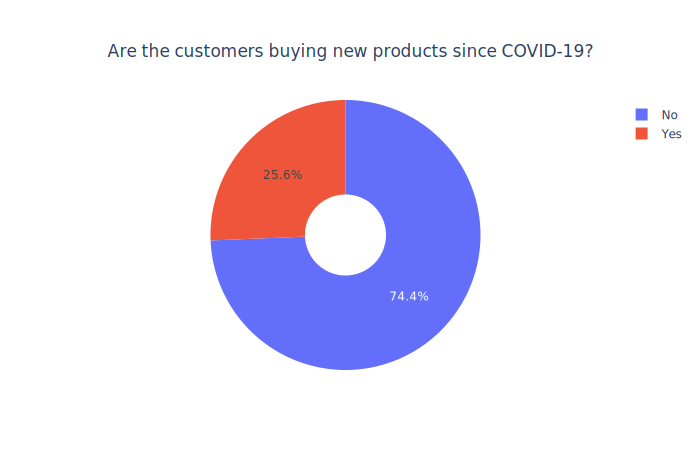

In [43]:
labels = a_df['col'].value_counts().index
values = a_df['col'].value_counts().values

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])

fig.update_layout( title={
        'text': "Are the customers buying new products since COVID-19?",
        'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.show(renderer='svg')

## Compared to before quarantine, what are the biggest driver in your purchase decision?

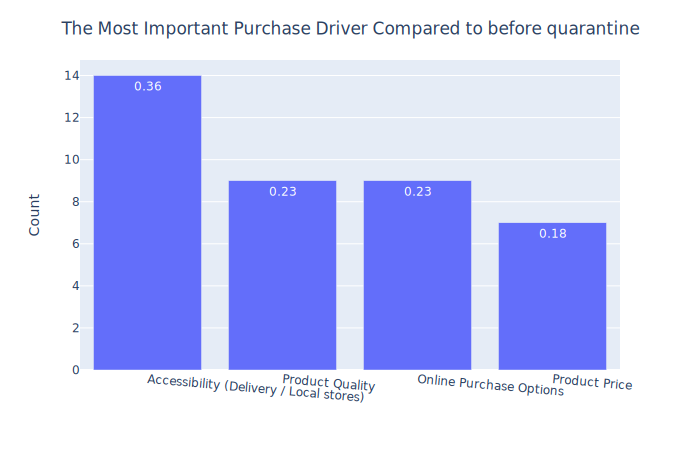

In [44]:
b = df['purchasing_driver'].value_counts()
fig = px.bar(b, x=b.index, y=b.values, height=400,text=np.round((b.values / sum(b.values)),2))
fig.update_layout( title={
        'text': 'The Most Important Purchase Driver Compared to before quarantine',
        'y':0.95,'x':0.5,'xanchor': 'center','yanchor': 'top'},
    xaxis_title="",
    yaxis_title="Count")
fig.update_xaxes(tickangle=5)
fig.show(renderer='svg')

From the above chart, we understand that accessibility (Delivery / Local stores) is the most important purchase driver to the customers compared to before quarantine. Also, the following figure shows that product price has
the least importance for women.

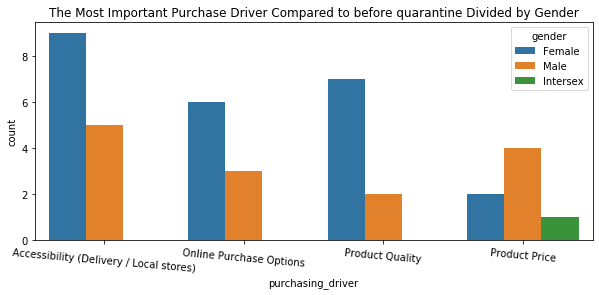

In [45]:
plt.figure(figsize = (10,4))
sns.countplot(df['purchasing_driver'], hue=df["gender"])
plt.title('The Most Important Purchase Driver Compared to before quarantine Divided by Gender')
plt.xticks(rotation=-5)
plt.show()

## What makes you decide to buy a product that you tried? 

In [46]:
df['try_again'].unique()

array(['Product Quality', 'Online Purchase Options', 'Product Price',
       'Accessibility (Delivery / local stores)'], dtype=object)

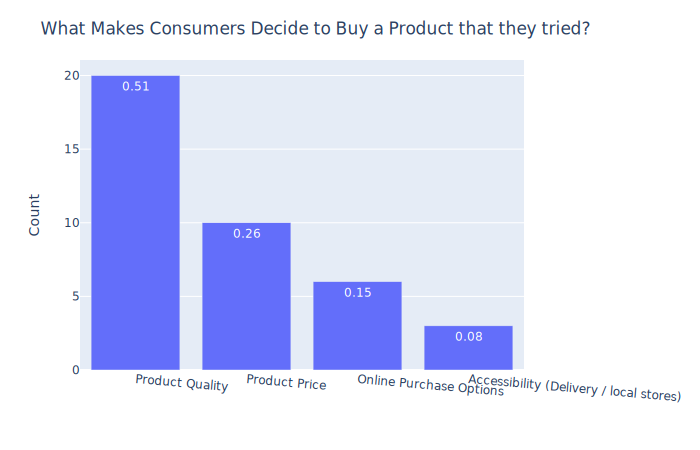

In [47]:
d = df['try_again'].value_counts()
fig = px.bar(d, x=d.index, y=d.values, height=400,text=np.round((d.values / sum(d.values)),2))
fig.update_layout( title={
        'text': 'What Makes Consumers Decide to Buy a Product that they tried?',
        'y':0.95,'x':0.45,'xanchor': 'center','yanchor': 'top'},
    xaxis_title="",
    yaxis_title="Count")
fig.update_xaxes(tickangle=5)
fig.show(renderer='svg')

In contrast with the graph that shows the most important purchase driver compared to before quarantine, we can see that product quality and product price are the two main reasons that make consumers decide to buy a product that they have tried before. In this case, Accessibility (Delivery / local stores) has the least importance for the consumers.

## Are you interested in trying new products that you have never tried before?

In [48]:
df['try_new'].unique()

array(['Yes, but I need to try a sample first.',
       'Yes, I buy new products regularly', 'No'], dtype=object)

In [49]:
len(df['try_new'].unique())

3

In [50]:
df = df.replace('Yes, but I need to try a sample first.', 'sample first')
df = df.replace('Yes, I buy new products regularly', 'Yes regularly')

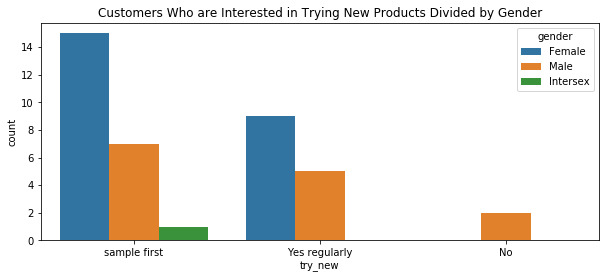

In [51]:
plt.figure(figsize = (10,4))
sns.countplot(df['try_new'], hue=df["gender"])
plt.title('Customers Who are Interested in Trying New Products Divided by Gender')
plt.show()

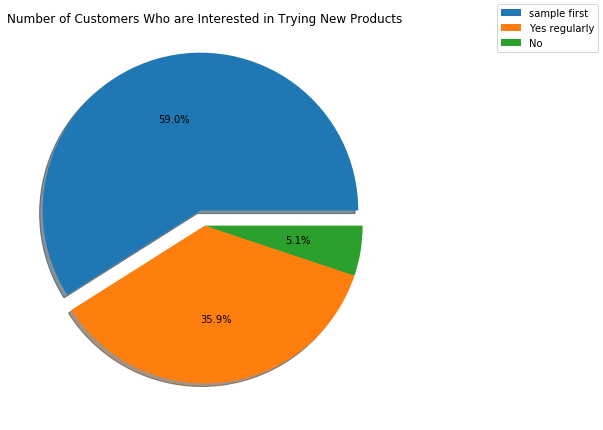

In [52]:
fig,ax = plt.subplots(figsize = (11, 6))

explode = (0.1, 0, 0)
ax.pie(df['try_new'].value_counts(), autopct='%1.1f%%', explode=explode, shadow=True)
ax.set_title('Number of Customers Who are Interested in Trying New Products')

fig.legend(df['try_new'].value_counts().index)
plt.tight_layout()
plt.show()

The bar chart illustrates the number of customers who are interested in trying new products and it is divided by gender. This graph shows only customers who are not interested in buying new products are men. 
Also, the pie chart shows near 60% of customers are willing to buy new items if they try a sample first. 

## What makes you decide to buy new products?

Now we are curious to find what makes consumers decide to buy new products?

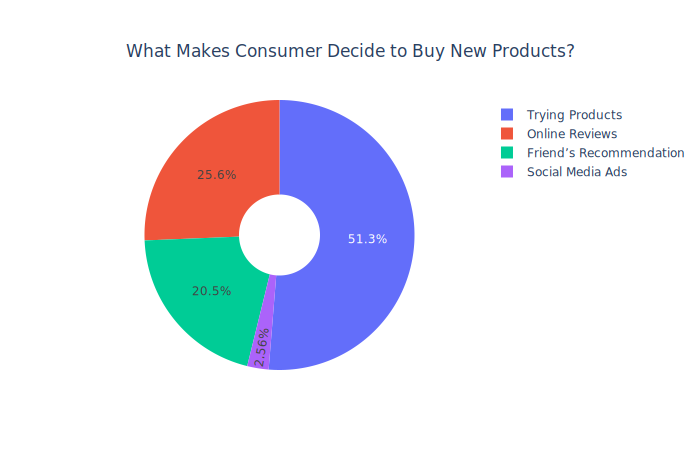

In [53]:
labels = df['decide_on_product'].value_counts().index
values = df['decide_on_product'].value_counts().values

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])

fig.update_layout( title={
        'text': "What Makes Consumer Decide to Buy New Products?",
        'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.show(renderer='svg')

When it comes to buying a new product, more than half of the consumers prefer to try the product first. The second and third important features are online reviews and friend's recommendation respectively.
It is good to mention that social media ads make only 2.5 percent of consumers to buy a new product.

## Did you ever buy a consumer product from an advertisement on Instagram or Facebook?

In [54]:
# Change the "Products advertised on Instagram are horrible" answer to Never

df = df.replace('Products advertised on Instagram are horrible', 'Never')

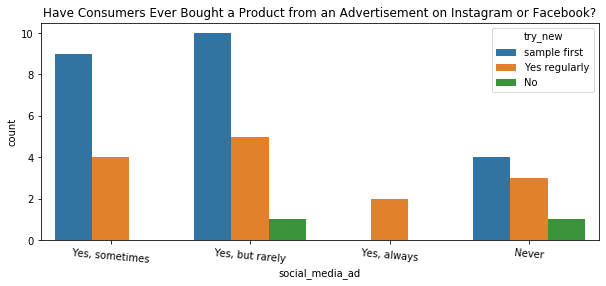

In [55]:
plt.figure(figsize = (10,4))
sns.countplot(df['social_media_ad'], hue=df["try_new"])
plt.title('Have Consumers Ever Bought a Product from an Advertisement on Instagram or Facebook?')
plt.xticks(rotation=-5)
plt.show()

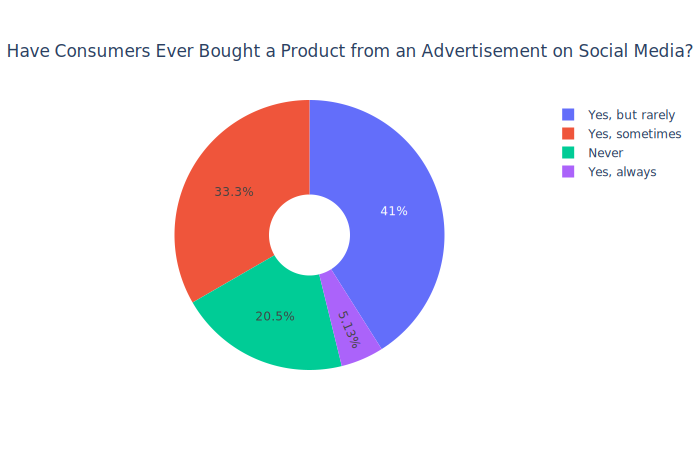

In [56]:
labels = df['social_media_ad'].value_counts().index
values = df['social_media_ad'].value_counts().values

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])

fig.update_layout( title={
        'text': "Have Consumers Ever Bought a Product from an Advertisement on Social Media?",
        'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.show(renderer='svg')

The above pie chart shows that 41% of consumers rarely shop from social media advertisements, 33 percent sometimes shop and 20.5 percent never but anything from the advertisement on Instagram or Facebook.
As we expected, the only consumers who always shop from social media advertisements are the ones who regularly buy new items.

## Is eating healthy and exercising important to you or anyone in your household?

In [57]:
df = df.replace('I exercise and eat healthy from time to time ', 'time to time')
df = df.replace('I don’t care too much about exercise or diet', 'not so much')

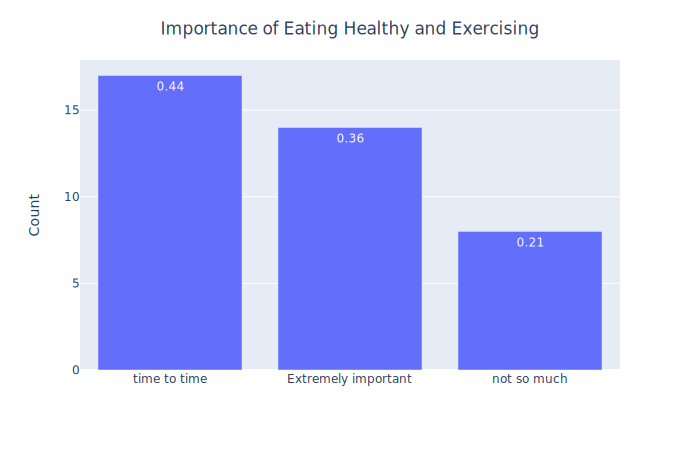

In [58]:
c = df['health'].value_counts()
fig = px.bar(c, x=c.index, y=c.values, height=400,text=np.round((c.values / sum(c.values)),2))
fig.update_layout( title={
        'text': "Importance of Eating Healthy and Exercising",
        'y':0.95,'x':0.5,'xanchor': 'center','yanchor': 'top'},
    xaxis_title="",
    yaxis_title="Count")
fig.update_xaxes(tickangle=0)
fig.show(renderer='svg')

According to the above bar chart, 44 percent of consumers exercise and eat healthily from time to time and for 36 percent of them exercising and eating healthy is extremely important.
However, for 21 percent of people, these aspects are not very important.

## When it comes to consumer products, do you buy premium goods?

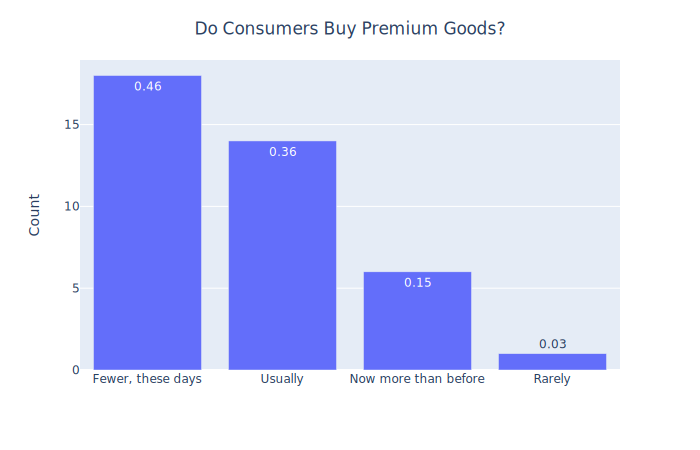

In [59]:
d = df['premium_goods'].value_counts()
fig = px.bar(d, x=d.index, y=d.values, height=400,text=np.round((d.values / sum(c.values)),2))
fig.update_layout( title={
        'text': "Do Consumers Buy Premium Goods?",
        'y':0.95,'x':0.5,'xanchor': 'center','yanchor': 'top'},
    xaxis_title="",
    yaxis_title="Count")
fig.update_xaxes(tickangle=0)
fig.show(renderer='svg')

The above graph shows that 46 percent of consumers are buying fewer premium goods these days, however, 36 percent usually but these goods.
On the other hand, only 3 percent of consumers rarely buy premium goods.

# Customer Segmentation using K-Means Clustering method in order to group similar users

In [60]:
df.columns

Index(['buy_since_covid', 'try_new', 'purchasing_driver', 'social_media_ad',
       'health', 'try_again', 'decide_on_product', 'premium_goods', 'gender',
       'user_id', 'city', 'province'],
      dtype='object', name='question')

In [61]:
#Convert columns to one-hot encoder
dummies = pd.get_dummies(df['buy_since_covid'],drop_first=True)
df= pd.concat( [df.drop('buy_since_covid',axis=1),dummies],axis=1)

dummies2 = pd.get_dummies(df['try_new'],drop_first=True)
df= pd.concat( [df.drop('try_new',axis=1),dummies2],axis=1)

dummies3 = pd.get_dummies(df['purchasing_driver'],drop_first=True)
df= pd.concat( [df.drop('purchasing_driver',axis=1),dummies3],axis=1)

dummies4 = pd.get_dummies(df['social_media_ad'],drop_first=True)
df= pd.concat( [df.drop('social_media_ad',axis=1),dummies4],axis=1)

dummies5 = pd.get_dummies(df['health'],drop_first=True)
df= pd.concat( [df.drop('health',axis=1),dummies5],axis=1)

dummies6 = pd.get_dummies(df['try_again'],drop_first=True)
df= pd.concat( [df.drop('try_again',axis=1),dummies6],axis=1)

dummies7 = pd.get_dummies(df['decide_on_product'],drop_first=True)
df= pd.concat( [df.drop('decide_on_product',axis=1),dummies7],axis=1)

dummies8 = pd.get_dummies(df['premium_goods'],drop_first=True)
df= pd.concat( [df.drop('premium_goods',axis=1),dummies8],axis=1)

dummies9 = pd.get_dummies(df['gender'],drop_first=True)
df= pd.concat( [df.drop('gender',axis=1),dummies9],axis=1)

dummies10 = pd.get_dummies(df['city'],drop_first=True)
df= pd.concat( [df.drop('city',axis=1),dummies10],axis=1)

dummies11 = pd.get_dummies(df['province'],drop_first=True)
df= pd.concat( [df.drop('province',axis=1),dummies11],axis=1)

In [62]:
df.head()

,user_id,No Cannot find new product,No but love to,Yes actively,Yes regularly,sample first,Online Purchase Options,Product Price,Product Quality,"Yes, always",...,PortHope,Toronto,TwoHills,Unity,Waterloo,BritishColumbia,NovaScotia,Ontario,Quebec,Saskatchewan
0,0022601F-B1CB-4BC2-8F72-C20F231F5C2E,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,067E2182-3CB6-4D74-ACF0-B334C733D6CC,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,179131D8-9495-437D-9230-A55B672B880A,0,1,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,24329031-FC5C-4D20-8560-5B53CA5BE38B,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,24CA4D2E-BF4F-43C8-9F91-67BF4CACBA0A,0,1,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [63]:
user = df['user_id']
df = df.drop('user_id',axis=1)
X=df

In [64]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

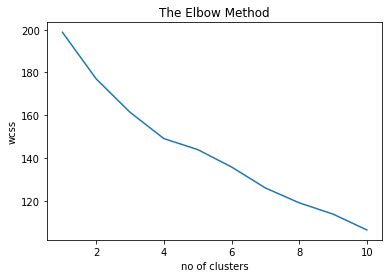

In [65]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

We want to group customers based on their similarity using a Machine Learning technique called K-Means. The above graph shows that we can divide consumers into 4 groups to reach optimal results.



In [66]:
kmeansmodel = KMeans(n_clusters= 4, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

In [67]:
k_mean = pd.DataFrame({'user_id':user})

In [68]:
k_mean['predicted_cluster']=y_kmeans

In [69]:
k_mean.head(n=10)

,user_id,predicted_cluster
0,0022601F-B1CB-4BC2-8F72-C20F231F5C2E,2
1,067E2182-3CB6-4D74-ACF0-B334C733D6CC,0
2,179131D8-9495-437D-9230-A55B672B880A,0
3,24329031-FC5C-4D20-8560-5B53CA5BE38B,1
4,24CA4D2E-BF4F-43C8-9F91-67BF4CACBA0A,1
5,27394A30-9CA8-4DA1-9368-8F4B8C8A6BF2,2
6,290DCE9C-8347-466D-B841-7F7FF20FF310,2
7,32CB510C-6C84-4A22-97B1-B15AB6C59D27,1
8,39B641F7-BDC9-4043-B938-A5D9E7669301,3
9,3F7B47E0-F115-4A80-A454-5B525EA978D0,1
